## Audio Analysis and silence detection

Todo: Ask Petri what "segments" are in opensmile, it doesn't seem to square when it comes to the numbers.

In [47]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa
import opensmile

# to play the audio files
from IPython.display import Audio

from constants import metadata_file_mappings

%matplotlib inline

In [48]:
df = pd.read_csv(metadata_file_mappings)
df

,path,filename,participant,statement,confidence_level,confidence_type,accuracy,free_cued_recall
0,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s08.wav',31,8.0,NaN,NaN,1,2
1,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s25.wav',31,25.0,60.0,1.0,1,2
2,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s32.wav',31,32.0,100.0,1.0,1,2
3,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s37.wav',31,37.0,NaN,NaN,0,2
4,/home/tim/Downloads/klippta_ljudfiler/w31_t01/...,'S2_w31_t1_s23.wav',31,23.0,NaN,NaN,0,2
...,...,...,...,...,...,...,...,...
3338,/home/tim/Downloads/klippta_ljudfiler/w40_t01/...,'S2_w40_t1_s31.wav',40,31.0,NaN,NaN,1,2
3339,/home/tim/Downloads/klippta_ljudfiler/w40_t01/...,'S2_w40_t1_s18.wav',40,18.0,NaN,NaN,1,2
3340,/home/tim/Downloads/klippta_ljudfiler/w40_t01/...,'S2_w40_t1_s78.wav',40,78.0,100.0,1.0,1,2
3341,/home/tim/Downloads/klippta_ljudfiler/w40_t01/...,'S2_w40_t1_s24.wav',40,24.0,60.0,1.0,0,2


In [49]:
paths = df["path"].values
path = paths[30]
path

'/home/tim/Downloads/klippta_ljudfiler/w31_t01/S2_w31_t1_s27.wav'

In [50]:
Audio(path)

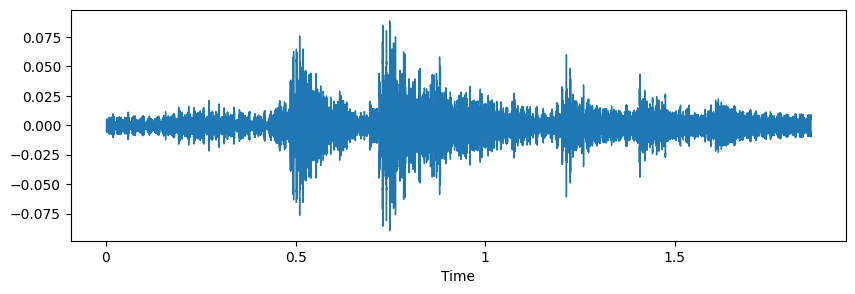

In [51]:
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 3))
librosa.display.waveshow(data, sr=sampling_rate)

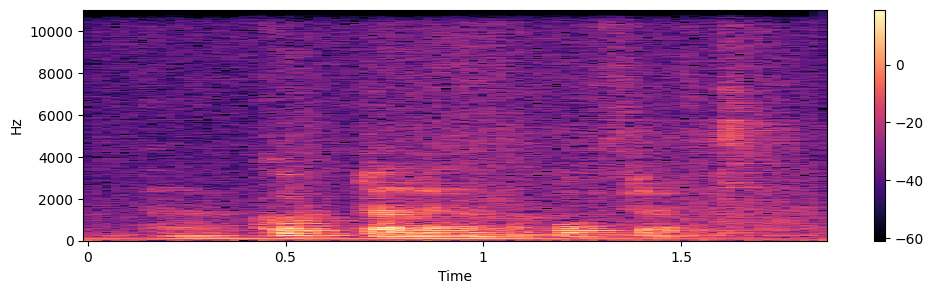

In [52]:
# short fourier transform
# X will be a matrix with:
# - rows corresponding to frequency components
# - columns corresponding to time frames
# Thus, every time frame has a vector of frequency components.
X = librosa.stft(data)

Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 3))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

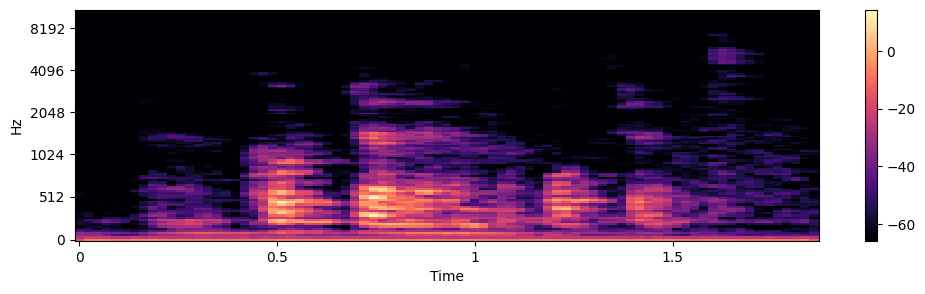

In [53]:
# short fourier transform
X = librosa.feature.melspectrogram(y=data, sr=sampling_rate)

Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 3))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar()

## Extract opensmile data

### Low level descriptors

In [54]:
# set opensmile parameters
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

# process sound file
df_smile_lld = smile.process_file(path)
df_smile_lld

Loudness_sma3  \
file                                               start                  end                                        
/home/tim/Downloads/klippta_ljudfiler/w31_t01/S... 0 days 00:00:00        0 days 00:00:00.020000          0.170313   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000          0.166698   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000          0.161595   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000          0.153327   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000          0.154895   
...                                                                                                            ...   
                                                   0 days 00:00:01.760000 0 days 00:00:01.780000          0.302526   
                                                   0 days 00:00:01.770000 0 days 00:00:01.790000          0.293154   
                                                   0 days 00:00:01.780000 0 days 00:00:01.800000          0.285934   
                                                   0 days 00:00:01.790000 0 days 00:00:01.810000          0.275881   
                                                   0 days 00:00:01.800000 0 days 00:00:01.857596372       0.262768   

                                                                                                     alphaRatio_sma3  \
file                                               start                  end                                          
/home/tim/Downloads/klippta_ljudfiler/w31_t01/S... 0 days 00:00:00        0 days 00:00:00.020000          -19.986717   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000          -20.593950   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000          -20.599794   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000          -21.444494   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000          -21.407084   
...                                                                                                              ...   
                                                   0 days 00:00:01.760000 0 days 00:00:01.780000          -10.680743   
                                                   0 days 00:00:01.770000 0 days 00:00:01.790000          -12.441401   
                                                   0 days 00:00:01.780000 0 days 00:00:01.800000          -11.714330   
                                                   0 days 00:00:01.790000 0 days 00:00:01.810000          -12.282802   
                                                   0 days 00:00:01.800000 0 days 00:00:01.857596372       -12.431619   

                                                                                                     hammarbergIndex_sma3  \
file                                               start                  end                                               
/home/tim/Downloads/klippta_ljudfiler/w31_t01/S... 0 days 00:00:00        0 days 00:00:00.020000                31.308565   
                                                   0 days 00:00:00.010000 0 days 00:00:00.030000                31.509781   
                                                   0 days 00:00:00.020000 0 days 00:00:00.040000                31.090876   
                                                   0 days 00:00:00.030000 0 days 00:00:00.050000                32.698940   
                                                   0 days 00:00:00.040000 0 days 00:00:00.060000                32.757206   
...                                                                                                                   ...   
     

In [55]:
# Reset the 'file' part of the MultiIndex
df_smile_lld.reset_index(level='file', drop=True, inplace=True)

# Create a new column 'combined' that calculates the midpoint between 'start' and 'end' intervals
simple_index = [start.total_seconds() for start, end in df_smile_lld.index]

# Set the 'combined' column as the index and drop the original MultiIndex columns
df_smile_lld["simple_index"] = simple_index

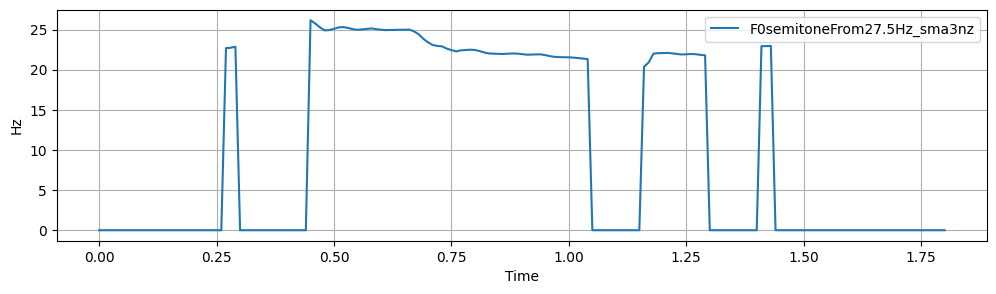

In [56]:
df_smile_lld.plot(x="simple_index", y='F0semitoneFrom27.5Hz_sma3nz', kind='line', figsize=(12, 3))

plt.xlabel('Time')
plt.ylabel('Hz')
plt.grid(True)
plt.show()

### Functionals

In [57]:
# set opensmile parameters
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# process sound file
df_smile_func = smile.process_file(path)
df_smile_func

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/home/tim/Downloads/klippta_ljudfiler/w31_t01/S2_w31_t1_s27.wav,0 days,0 days 00:00:01.857596372,23.010008,0.063517,21.888597,22.423931,24.970009,3.081411,75.27758,40.553795,8.808317,0.615945,...,-0.05281,-0.007238,0.113231,3.804348,2.234637,0.19,0.235266,0.188,0.096,-39.538879


## Silence Detection

In [58]:
total_duration = df_smile_lld.index.get_level_values("end").max().total_seconds()
total_segments = len(df_smile_lld)
print("total duration: ", total_duration)
print("total segments: ", total_segments)

total duration:  1.857596
total segments:  181


There is approximately 10 ms per segment...

Now let's split the lld dataframe into voiced and unvoiced segments

In [59]:
voiced_df = df_smile_lld[df_smile_lld['F0semitoneFrom27.5Hz_sma3nz'] != 0]
unvoiced_df = df_smile_lld[df_smile_lld['F0semitoneFrom27.5Hz_sma3nz'] == 0]
print("The proportion of voiced to unvoiced segments is: ", len(voiced_df) / (len(df_smile_lld)))

The proportion of voiced to unvoiced segments is:  0.4419889502762431


Let's find continuously voiced segments...

In [60]:
cont_voiced_segments = []
n_segments = 0

for F0 in df_smile_lld['F0semitoneFrom27.5Hz_sma3nz'].values:
    # this means unvoiced
    if F0 == 0:
        # check if we have recorded voice in previous segment
        if n_segments > 0:
            # if so save this in the cont_voiced_segments list
            cont_voiced_segments.append(n_segments)
        # and reset
        n_segments = 0
    else:
        # if F0 is not zero, it means there is voice and therefore we increment the n_segments integer
        n_segments += 1    

In [61]:
cont_voiced_segments

[3, 60, 14, 3]

In [62]:
print("Number of voiced segments divided by total duration: ",  len(cont_voiced_segments) / total_duration)

Number of voiced segments divided by total duration:  2.153320743584719


In [63]:
print("VoicedSegmentsPerSec: ", df_smile_func["VoicedSegmentsPerSec"].values[0])

VoicedSegmentsPerSec:  2.234637


In [64]:
print("Mean length of continuously voiced segments: ", np.asarray(cont_voiced_segments).mean())

Mean length of continuously voiced segments:  20.0


In [65]:
print("MeanVoicedSegmentLengthSec: ", df_smile_func["MeanVoicedSegmentLengthSec"].values[0])

MeanVoicedSegmentLengthSec:  0.19


Let's look at continuously unvoiced segments

In [66]:
cont_unvoiced_segments = []
n_segments = 0
for F0 in df_smile_lld['F0semitoneFrom27.5Hz_sma3nz'].values:
    # means there is voice
    if F0 != 0:
        if n_segments > 0:
            cont_unvoiced_segments.append(n_segments)
        n_segments = 0
    else:
        # no voice, increment n_segments
        n_segments += 1    

In [67]:
cont_unvoiced_segments

[27, 15, 11, 11]

In [68]:
print("mean length of continuously unvoiced segments: ", np.asarray(cont_unvoiced_segments).mean())

mean length of continuously unvoiced segments:  16.0


In [69]:
print("MeanUnvoicedSegmentLength: ", df_smile_func["MeanUnvoicedSegmentLength"].values[0])

MeanUnvoicedSegmentLength:  0.188
